<a href="https://colab.research.google.com/github/15IITian/Axios_trial/blob/main/Correcting_prices_anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split




In [ ]:
df=pd.read_csv("part2.csv")
temp = df.copy()
temp.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,other,BHK,Independent Floor,Andheri West,56800.0,1201.0,Semi-Furnished,2 bathrooms
1,OWNER,1,BHK,Apartment,Andheri East,26000.0,595.0,Furnished,1 bathrooms
2,OWNER,1,BHK,Apartment,other,12500.0,560.0,Unfurnished,2 bathrooms
3,OWNER,2,BHK,Apartment,other,36000.0,860.0,Semi-Furnished,2 bathrooms
4,OWNER,2,BHK,Independent Floor,other,65000.0,1000.0,Furnished,3 bathrooms


## Creating new dataset which do not contain price < 2000
## remove rows where bedroom , bathroom -> other

In [ ]:
temp=temp[temp['price'] > 2000]
temp['seller_type'].fillna(temp['seller_type'].mode()[0], inplace=True)


In [ ]:
temp=temp[(temp['bedroom'] !='other') & (temp['bathroom'] != 'other')]

In [ ]:
temp['bathroom'].unique()

array(['1 bathrooms', '2 bathrooms', '3 bathrooms'], dtype=object)

In [ ]:
temp['bedroom'].unique()

array(['1', '2', '3'], dtype=object)

In [ ]:
temp.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
1,OWNER,1,BHK,Apartment,Andheri East,26000.0,595.0,Furnished,1 bathrooms
2,OWNER,1,BHK,Apartment,other,12500.0,560.0,Unfurnished,2 bathrooms
3,OWNER,2,BHK,Apartment,other,36000.0,860.0,Semi-Furnished,2 bathrooms
4,OWNER,2,BHK,Independent Floor,other,65000.0,1000.0,Furnished,3 bathrooms
5,OWNER,1,RK,Studio Apartment,Andheri East,36000.0,200.0,Furnished,1 bathrooms


# Feature eengineering->

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30063 entries, 1 to 33358
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    30063 non-null  object 
 1   bedroom        30063 non-null  object 
 2   layout_type    30063 non-null  object 
 3   property_type  30063 non-null  object 
 4   locality       30063 non-null  object 
 5   price          30063 non-null  float64
 6   area           30063 non-null  float64
 7   furnish_type   30063 non-null  object 
 8   bathroom       30063 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.3+ MB


In [ ]:
temp.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64

In [ ]:
temp['bathroom']=temp['bathroom'].str.replace(' bathrooms','')


In [ ]:
temp['bathroom']=temp['bathroom'].astype(int )
temp['bedroom']=temp['bedroom'].astype(int)
lst= ['seller_type','layout_type','property_type','locality','furnish_type']
copy =temp.copy()



In [ ]:
copy=pd.get_dummies(copy,columns=lst,drop_first= True)

In [ ]:
temp =copy

In [ ]:
temp.sample(10)

,bedroom,price,area,bathroom,seller_type_BUILDER,seller_type_OWNER,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,...,locality_Andheri West,locality_Bandra West,locality_Chembur,locality_Kandivali East,locality_Kharghar,locality_Powai,locality_Thane West,locality_other,furnish_type_Semi-Furnished,furnish_type_Unfurnished
19363,3,85000.0,1600.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14721,2,23500.0,960.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
18076,1,35000.0,510.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10687,1,15000.0,446.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7311,1,34000.0,550.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
27705,1,14000.0,610.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
24855,2,38000.0,1000.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15684,1,31800.0,600.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
19412,2,22500.0,906.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
18931,2,13500.0,902.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
temp.isnull().sum()

bedroom                            0
price                              0
area                               0
bathroom                           0
seller_type_BUILDER                0
seller_type_OWNER                  0
layout_type_RK                     0
property_type_Independent Floor    0
property_type_Independent House    0
property_type_Penthouse            0
property_type_Studio Apartment     0
property_type_Villa                0
locality_Andheri West              0
locality_Bandra West               0
locality_Chembur                   0
locality_Kandivali East            0
locality_Kharghar                  0
locality_Powai                     0
locality_Thane West                0
locality_other                     0
furnish_type_Semi-Furnished        0
furnish_type_Unfurnished           0
dtype: int64

#

In [ ]:
def percentage(df, cat1, cat2):
  cate_cat1=list(df[cat1].unique())
  cate_cat2=list(df[cat2].unique())
  try:
    cate_cat1.remove(np.nan);
    cate_cat2.remove(np.nan);
  except:
    pass


  for i in cate_cat1:
    for j in cate_cat2:
      temp=df[(df[cat1]==i) & (df[cat2]==j)]
      den = df[df[cat1]==i]
      print("{} && {}  = {}".format(i,j, f"{ temp.shape[0]*100 / den.shape[0]:.2f}" ) )

In [ ]:
percentage(temp, 'bedroom', 'bathroom')

1 && 1  = 67.16
1 && 2  = 32.32
1 && 3  = 0.52
2 && 1  = 5.92
2 && 2  = 91.66
2 && 3  = 2.43
3 && 1  = 2.20
3 && 2  = 21.22
3 && 3  = 76.58


In [ ]:
temp.corr()['area']['price']

0.5377040222296976

In [ ]:
def mul_num_cat(df, num, cat1,cat2,cat3):

  sns.countplot(data=df, x= cat1, hue=cat2)
  plt.show()
  print("\n\n")

  sns.barplot(data= df, x=cat1,y=num,hue=cat2)
  # plt.figure(figsize=(10, 20))
  # sns.set_context("notebook", rc={"figure.figsize": (30, 6)})
  plt.show()
  print("\n\n")
  # Boxplot
  sns.boxplot(data=df, x= cat1, y=num, hue=cat2)
  # plt.figure(figsize=(50, 20))
  plt.show()
  print("\n\n")

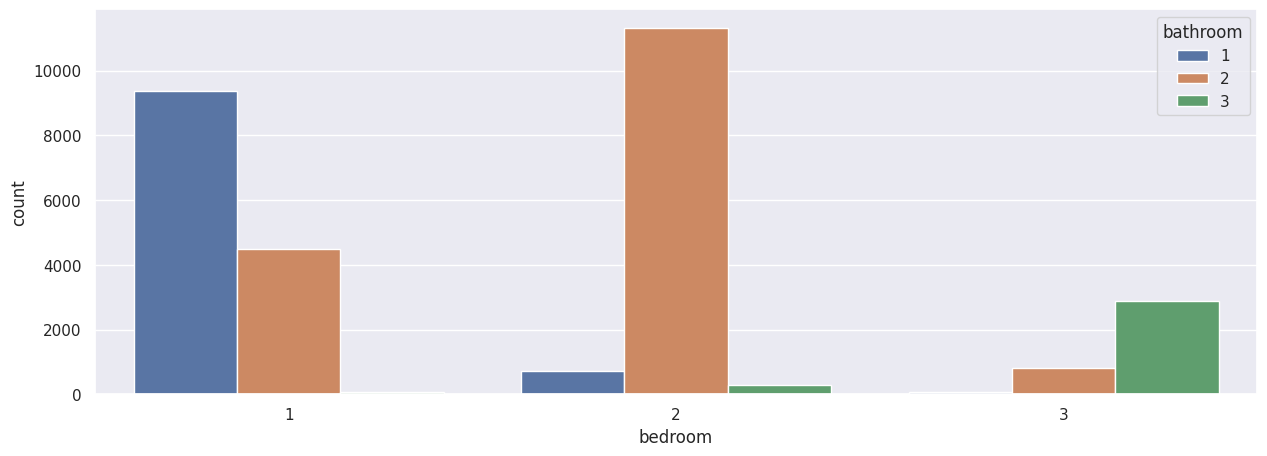

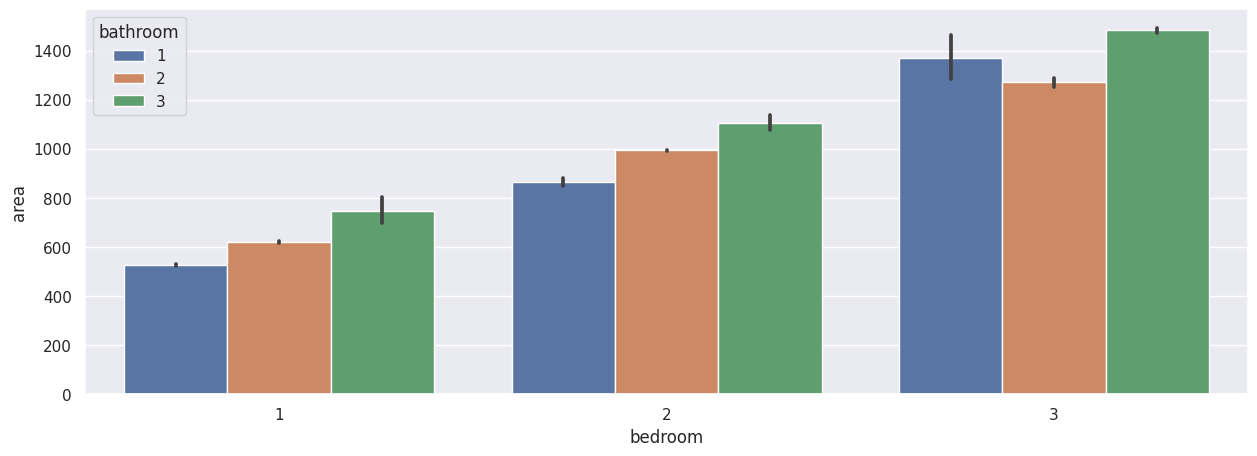

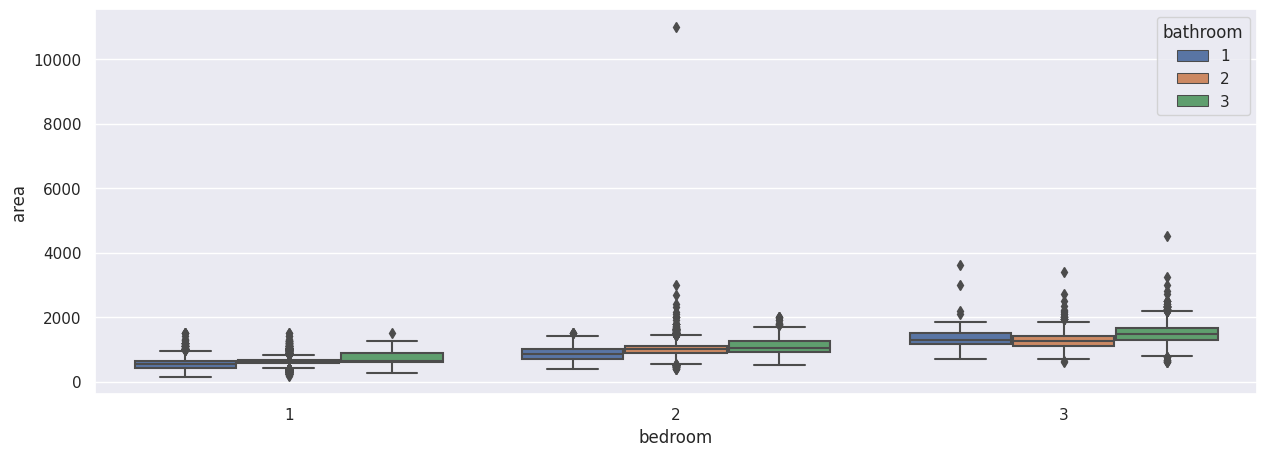

In [ ]:
mul_num_cat(temp, 'area', 'bedroom', 'bathroom', None)

<Axes: xlabel='area', ylabel='price'>

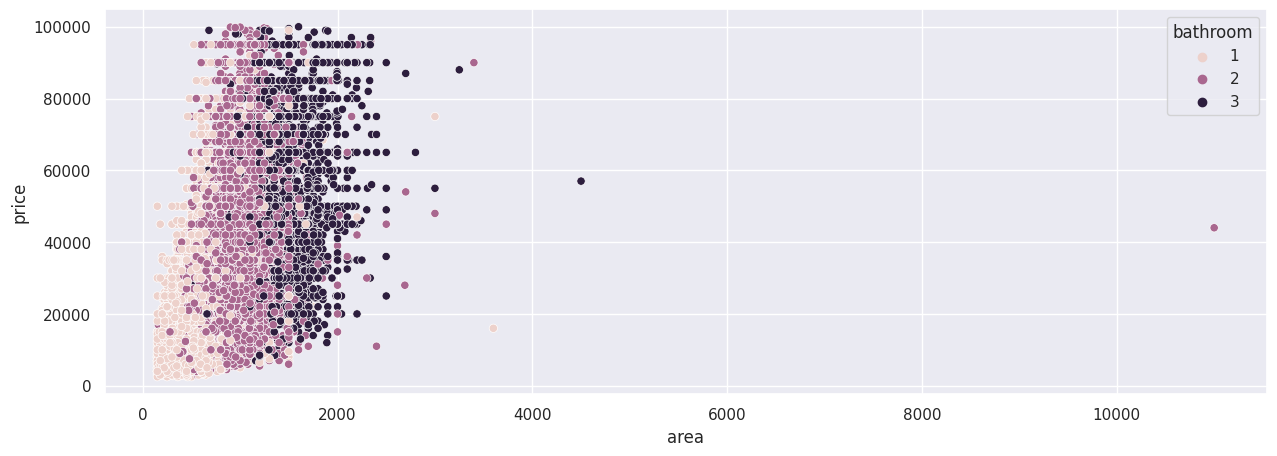

In [ ]:
sns.scatterplot(data= temp, x= 'area', y= 'price', hue='bathroom')

In [ ]:
temp.corr()['price']['area']

0.5377040222296976

In [ ]:
temp.head()

,bedroom,price,area,bathroom,seller_type_BUILDER,seller_type_OWNER,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,...,locality_Andheri West,locality_Bandra West,locality_Chembur,locality_Kandivali East,locality_Kharghar,locality_Powai,locality_Thane West,locality_other,furnish_type_Semi-Furnished,furnish_type_Unfurnished
1,1,26000.0,595.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,12500.0,560.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,36000.0,860.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,2,65000.0,1000.0,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,36000.0,200.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Tansformation->

<Axes: xlabel='price', ylabel='Density'>

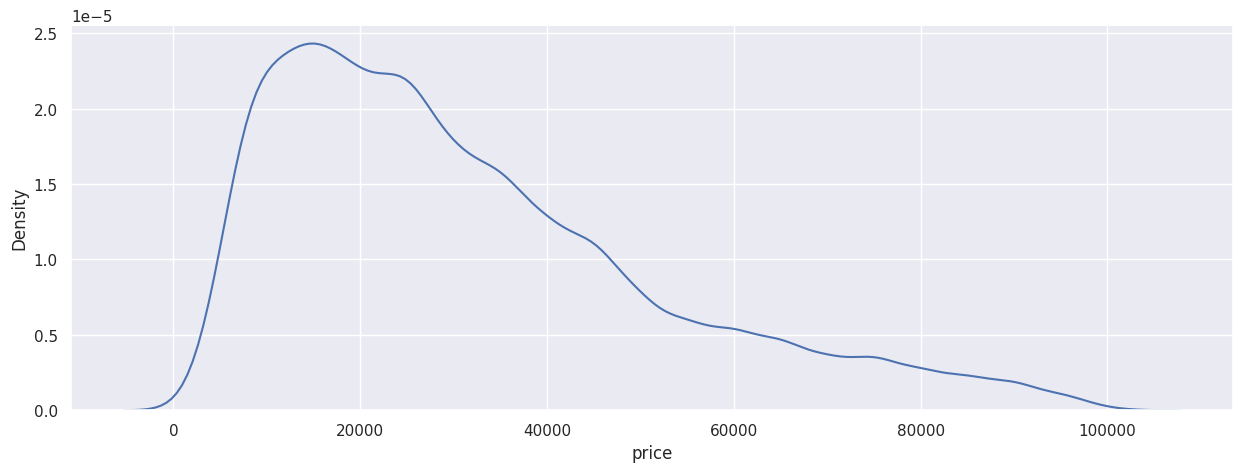

In [ ]:
sns.kdeplot(data=temp, x='price')

In [ ]:
temp['price'].skew()

1.0052204502502633

<Axes: xlabel='area', ylabel='Density'>

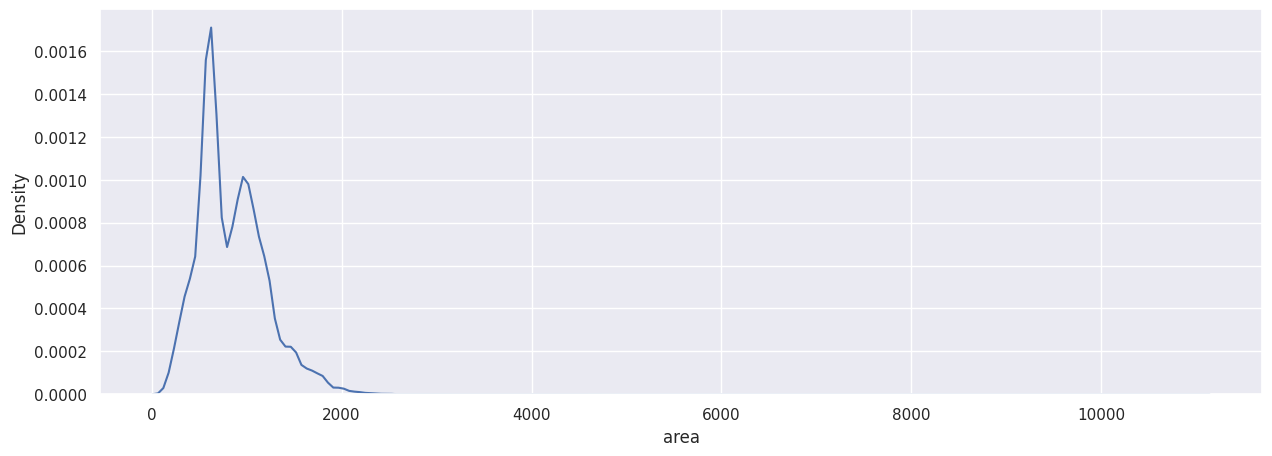

In [ ]:
sns.kdeplot(data=temp, x='area')

In [ ]:
temp['area'].skew()

1.56182216743673

<ipython-input-122-6aed64330d63>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['price'])


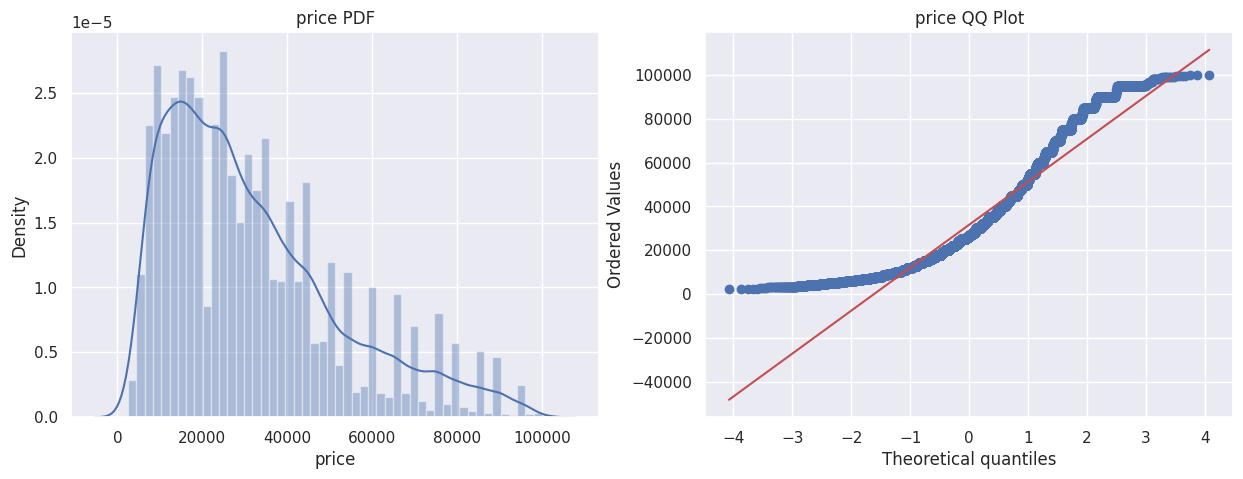

In [ ]:

import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
plt.subplot(121)
sns.distplot(temp['price'])
plt.title('price PDF')

plt.subplot(122)
stats.probplot(temp['price'], dist="norm", plot=plt)
plt.title('price QQ Plot')

plt.show()

In [ ]:
temp['price'].min()

2500.0

In [ ]:
copy= temp.copy()

In [ ]:

trf_log= FunctionTransformer(func = np.log)
trf_sqrt= FunctionTransformer(func = np.sqrt)
copy['price']= trf_sqrt.fit_transform(copy['price'])

# X_train_transformed = trf.fit_transform(X_train)
# X_test_transformed = trf.transform(X_test)

<ipython-input-136-ef84e0222e2d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy['price'])


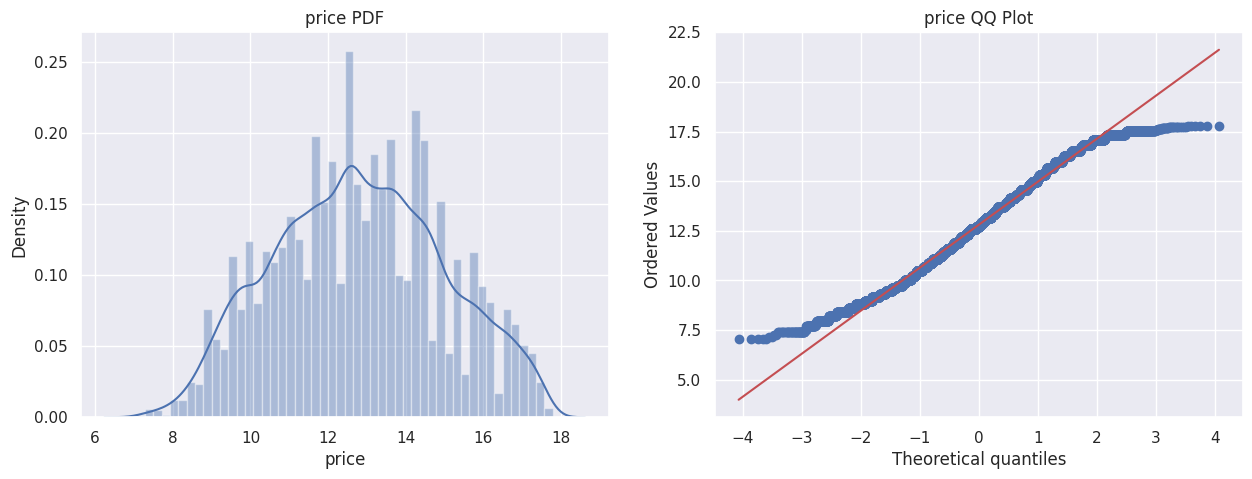

In [ ]:
copy['price']= trf_sqrt.fit_transform(copy['price'])
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
plt.subplot(121)
sns.distplot(copy['price'])
plt.title('price PDF')

plt.subplot(122)
stats.probplot(copy['price'], dist="norm", plot=plt)
plt.title('price QQ Plot')

plt.show()

<ipython-input-138-7820482cac18>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy['price'])


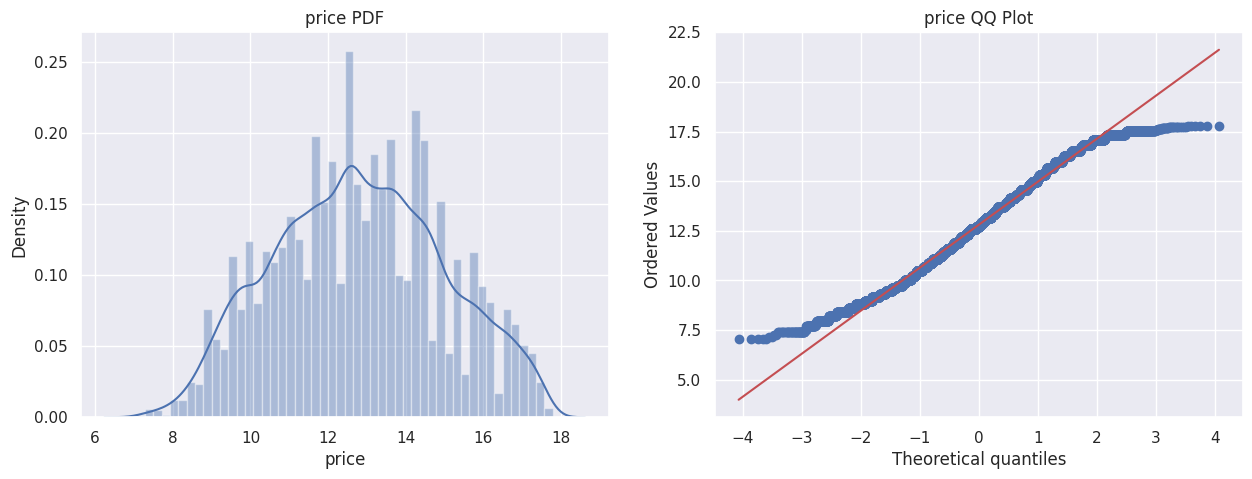

In [ ]:
plt.subplot(121)
sns.distplot(copy['price'])
plt.title('price PDF')

plt.subplot(122)
stats.probplot(copy['price'], dist="norm", plot=plt)
plt.title('price QQ Plot')

plt.show()

In [ ]:
copy['price'].skew()

0.046266594790653856

<ipython-input-146-a1e84bd2399f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['area'])


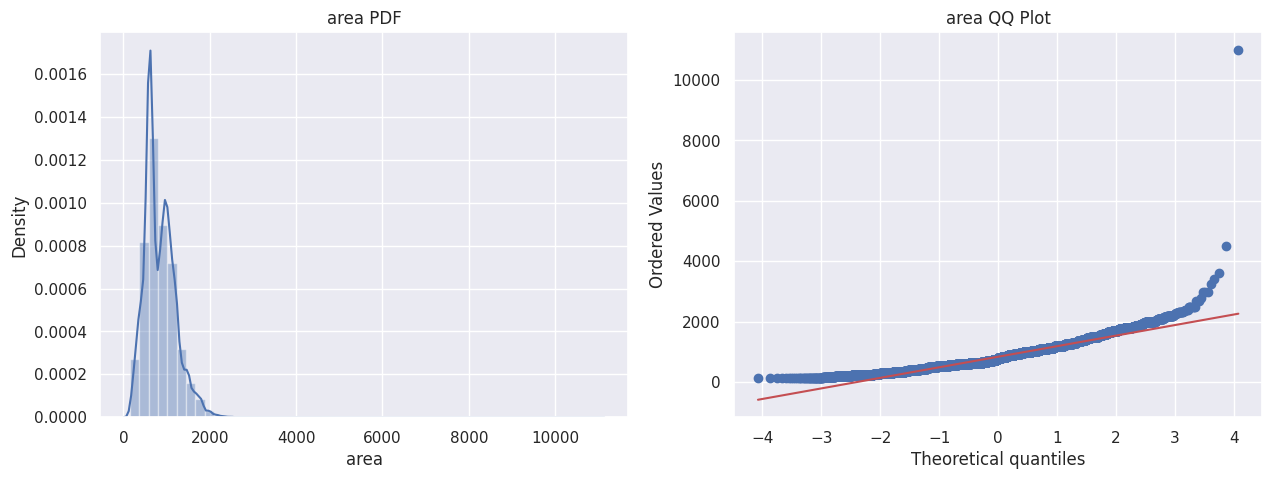

In [ ]:

plt.subplot(121)
sns.distplot(temp['area'])
plt.title('area PDF')

plt.subplot(122)
stats.probplot(temp['area'], dist="norm", plot=plt)
plt.title('area QQ Plot')

plt.show()

In [ ]:
temp= copy.copy()

In [ ]:
temp['price'].skew()

0.046266594790653856

In [ ]:
copy['area'].skew()

1.56182216743673

In [ ]:
temp['price'].skew()

1.0052204502502633

In [ ]:

temp.corr()['bedroom']['bathroom']

0.7505286049618216

In [ ]:
temp.corr()['area']['bedroom']

0.8336834247318898

In [ ]:
temp.corr()['area']['bathroom']

0.711724003564888

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# Sample data
data = {'HouseType': ['Apartment', 'House', 'Apartment', 'Condo', 'House'],
        'Location': ['Urban', 'Suburban', 'Urban', 'Rural', 'Suburban'],
        'PetsAllowed': ['Yes', 'No', 'Yes', 'No', 'Yes']}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=['HouseType', 'Location', 'PetsAllowed'], drop_first=True)

# Convert the one-hot encoded DataFrame to a sparse matrix
y= encoded_df['PetsAllowed_Yes']
encoded_df=encoded_df.drop('PetsAllowed_Yes', axis=1)
sparse_matrix = csr_matrix(encoded_df.values)

print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(encoded_df)
print("\nSparse Matrix:")
sparse_matrix = pd.DataFrame(sparse_matrix)
print(sparse_matrix)
print(type(sparse_matrix))


Original DataFrame:
   HouseType  Location PetsAllowed
0  Apartment     Urban         Yes
1      House  Suburban          No
2  Apartment     Urban         Yes
3      Condo     Rural          No
4      House  Suburban         Yes

One-Hot Encoded DataFrame:
   HouseType_Condo  HouseType_House  Location_Suburban  Location_Urban
0                0                0                  0               1
1                0                1                  1               0
2                0                0                  0               1
3                1                0                  0               0
4                0                1                  1               0

Sparse Matrix:
                          0
0                 (0, 3)\t1
1    (0, 1)\t1\n  (0, 2)\t1
2                 (0, 3)\t1
3                 (0, 0)\t1
4    (0, 1)\t1\n  (0, 2)\t1
<class 'pandas.core.frame.DataFrame'>


In [ ]:
sparse_matrix

,0
0,"(0, 3)\t1"
1,"(0, 1)\t1\n (0, 2)\t1"
2,"(0, 3)\t1"
3,"(0, 0)\t1"
4,"(0, 1)\t1\n (0, 2)\t1"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X_sparse is your sparse matrix and y is your target variable
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

X_train, X_test, y_train, y_test = train_test_split(sparse_matrix, y, test_size=0.2, random_state=42)


